# Seaborn

Seaborn merupakan API yang berdasar dari Matplotlib, memiliki high-level function untuk tipe plot yang umum digunakan untuk statistik. Seaborn juga dapat diintegrasikan dengan DataFrames dari Pandas.

Meskipun Matplotlib sudah menambahkan plt.style sehingga memudahkan untuk menangani Pandas, Seaborn tetap sangat direkomendasikan untuk digunakan.

## Seaborn vs Matplotlib

In [4]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd

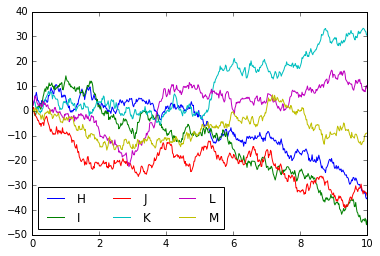

In [5]:
# contoh plot sederhana pada Matplotlib

## buat beberapa data
sat = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(sat.randn(500, 6), 0)

## plot data menggunakan setting default Matplotlib
plt.plot(x, y)
plt.legend('HIJKLM', ncol=3, loc='lower left')

In [6]:
# sekarang bandingkan dengan contoh penggunaan Seaborn untuk data yang sama
import seaborn as sns
sns.set()

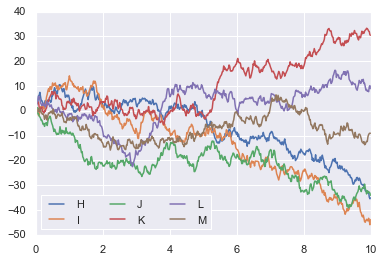

In [7]:
# menggunakan data yang sama dengan di atas
plt.plot(x, y)
plt.legend('HIJKLM', ncol=3, loc='lower left')

## Exploring Seaborn Plots

Tujuan utama **Seaborn** yaitu menyediakan perintah **high-level** untuk membuat berbagai jenis plot yang berguna pada eksplorasi data statistika, atau bahkan fitting model statistika.

Mari kita lihat beberapa jenis plot yang tersedia di Seaborn.

**_Catatan:_** contoh berikut dapat dihasilkan menggunakan perintah Matplotlib, tapi menggunakan API Seaborn akan lebih menyenangkan.

## Histogram, KDE, dan density

Seringkali pada visualisasi data statistika, yang kita perlukan hanyalah histogram dan joint distribution dari beberapa variabel.

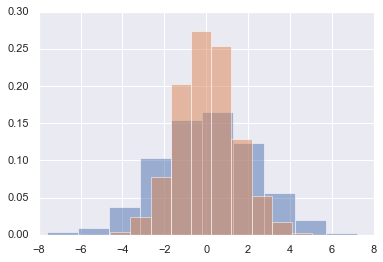

In [11]:
# contoh histogram
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
    plt.hist(data[col], bins=10, density=True, alpha=0.5)

Kita juga dapat menghasilkan estimasi yang tidak kasar dari distribusi tersebut menggunakan **_kernel density estimation (KDE)_** yang dapat dihasilkan menggunakan Seaborn dengan **sns.kdeplot**:

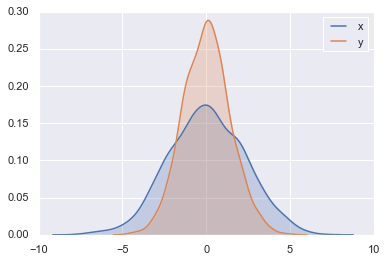

In [12]:
for col in 'xy':
    sns.kdeplot(data[col], shade=True)

**_Histogram dan KDE_** dapat digabungkan menggunakan **distplot**:

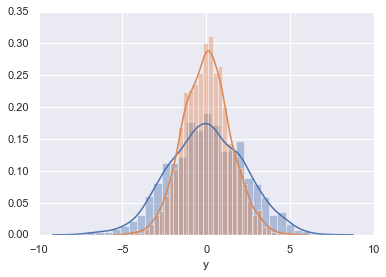

In [13]:
sns.distplot(data['x'])
sns.distplot(data['y']);

Jika kita menggunakan kedua data dari dataset ke dalam kdeplot, maka akan menghasilkan **visualisasi dua-dimensi** dari data tersebut:

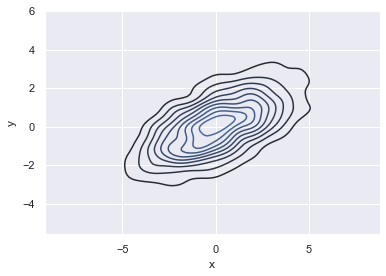

In [14]:
sns.kdeplot(data['x'], data['y']);

Kita dapat melihat **joint distribution** dan **marginal distribution** secara bersamaan menggunakan **sns.jointplot**. Untuk plot ini, kita gunakan **style white background**:

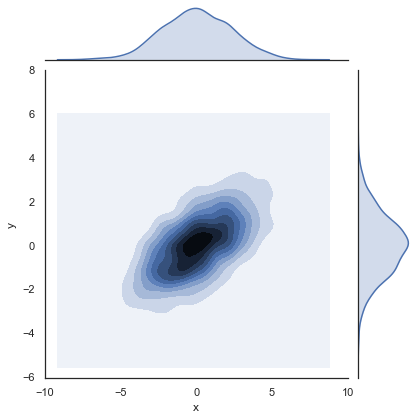

In [15]:
with sns.axes_style('white'):
    sns.jointplot(data['x'], data['y'], kind='kde')

Ada beberapa **parameter lain** yang dapat kita ganti pada **jointplot**, contohnya adalah kita dapat **menggunkaan histogram dengan base hexagonal**:

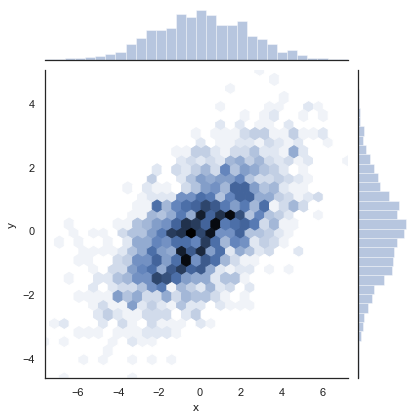

In [16]:
with sns.axes_style('white'):
    sns.jointplot(data['x'], data['y'], kind='hex');

## Pair plots

Ketika kita membuat **joint plot** menggunakan **dataset dengan dimensi yang lebih besar**, maka akan menghasilkan **pair plots**, yang sangat berguna untuk **mengeksplorasi hubungan antar data multidimensi**, juga melihat pair plots secara berpasangan.

In [17]:
# kita akan coba dengan dataset iris
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Mem-visualisasikan dengan mudah **hubungan multidimensi** dari beberapa sampel menggunakan **sns.pairplot**:

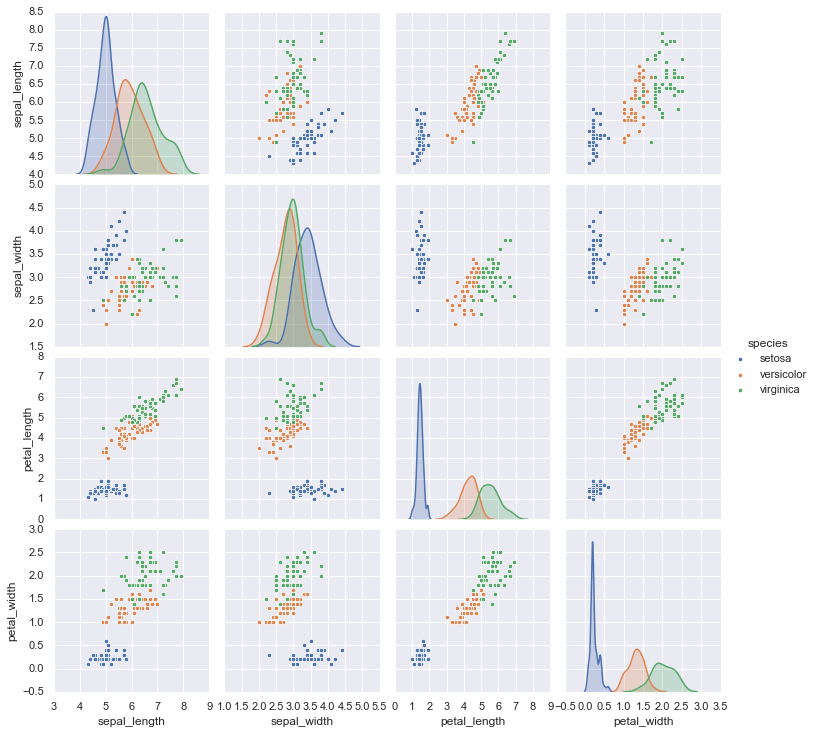

In [18]:
sns.pairplot(iris, hue='species');

## Faceted histograms

Terkadang, langkah terbaik ntuk menganalisa data adalah menggunakan histogram dari bagian-bagiannya. FacetGrid milik Seaborn menjadikan langkah ini sangat mudah.

In [19]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [20]:
tips['tip_persen'] = (100*tips['tip'])/ (tips['total_bill'])

In [21]:
tips[['tip_persen']].head()

,tip_persen
0,5.944673
1,16.054159
2,16.658734
3,13.978041
4,14.680765


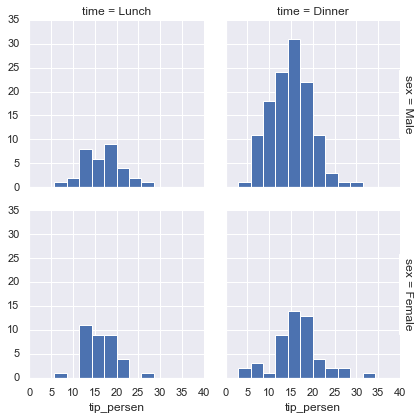

In [22]:
grid = sns.FacetGrid(tips, row='sex', col='time', margin_titles=True)
grid.map(plt.hist, "tip_persen", bins=np.linspace(0, 40, 15));

## Categorical plots

Categorical plots dapat juga digunakan untuk menampilkan visualisasi semacam ini. Kita dapat melihat distribusi sebuah parameter dalam bins yang memiliki nilai dari parameter lain

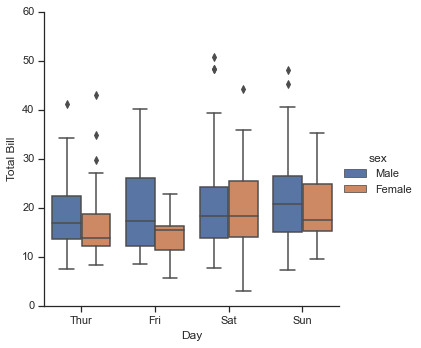

In [23]:
with sns.axes_style(style='ticks'):
    g = sns.catplot("day", "total_bill", "sex", data=tips, kind="box")
    g.set_axis_labels("Day", "Total Bill");

## Joint distributions

Seperti pair plot yang sudah kita bahas, kita dapat menggunakan sns.jointplot untuk menampilkan joint distribution antara dataset yang berbeda, seiring dengan marginal distributions-nya

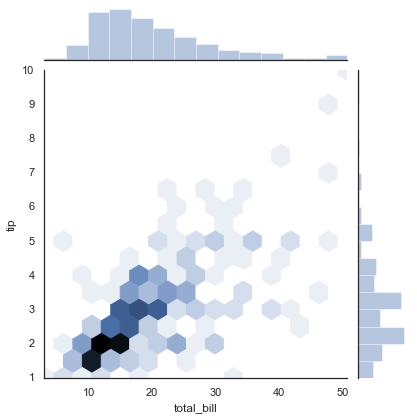

In [24]:
with sns.axes_style('white'):
    sns.jointplot("total_bill", "tip", data=tips, kind='hex')

Joint plot juga dapat melakukan kernel density estimation dan regression secara otomatis

C:\Users\Ari Wilyan\AppData\Roaming\Python\Python38\site-packages\numpy\linalg\linalg.py:1965: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


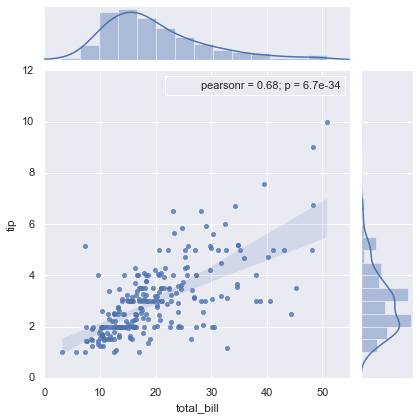

In [25]:
from scipy import stats

sns.jointplot('total_bill', 'tip', data=tips, kind='reg', stat_func=stats.pearsonr, xlim=(0, 55), ylim=(0, 12));

# stat_func --> deprecated
# xlim dan ylim --> ukuran grid

In [34]:
sns.jointplot?

## Bar plots

Time series data dapat ditampilkan menggunakan bar plot pada sns.catplot

In [28]:
import seaborn as sns

# planets = sns.load_dataset('planets')
planets = pd.read_csv('planets.csv')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


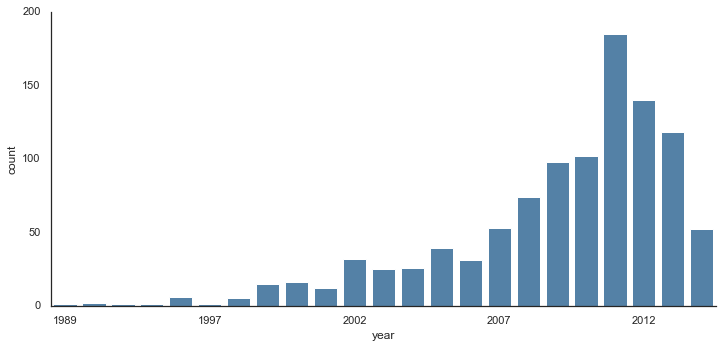

In [29]:
with sns.axes_style('white'):
    g = sns.catplot("year", data=planets, aspect=2,
                    kind="count", color='steelblue')
    g.set_xticklabels(step=5)